In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("2007-2016-homeless-texas.csv")
df.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,TX,TX-500,San Antonio/Bexar County CoC,Chronically Homeless Individuals,218
1,1/1/2007,TX,TX-500,San Antonio/Bexar County CoC,Homeless Individuals,"1,375"
2,1/1/2007,TX,TX-500,San Antonio/Bexar County CoC,Homeless People in Families,872
3,1/1/2007,TX,TX-500,San Antonio/Bexar County CoC,Sheltered Chronically Homeless Individuals,96
4,1/1/2007,TX,TX-500,San Antonio/Bexar County CoC,Sheltered Homeless,"1,798"


### Checking for Null values

In [5]:
df.isnull().sum()

Year          0
State         0
CoC Number    0
CoC Name      0
Measures      0
Count         0
dtype: int64

No null values found.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        2244 non-null   object
 1   State       2244 non-null   object
 2   CoC Number  2244 non-null   object
 3   CoC Name    2244 non-null   object
 4   Measures    2244 non-null   object
 5   Count       2244 non-null   object
dtypes: object(6)
memory usage: 105.3+ KB


# Preprocessing and Univariate Anaysis

## Year

In [7]:
df['Year'].value_counts()

1/1/2015    462
1/1/2016    462
1/1/2012    231
1/1/2011    231
1/1/2014    231
1/1/2013    231
1/1/2008    132
1/1/2009    132
1/1/2007    132
Name: Year, dtype: int64

Since it's just the year, we can remove the day and month part of the string.

In [8]:
df['Year'] = pd.to_datetime(df['Year'])

In [9]:
df['Year'] = df['Year'].apply(lambda x : x.year)

In [10]:
df.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,2007,TX,TX-500,San Antonio/Bexar County CoC,Chronically Homeless Individuals,218
1,2007,TX,TX-500,San Antonio/Bexar County CoC,Homeless Individuals,"1,375"
2,2007,TX,TX-500,San Antonio/Bexar County CoC,Homeless People in Families,872
3,2007,TX,TX-500,San Antonio/Bexar County CoC,Sheltered Chronically Homeless Individuals,96
4,2007,TX,TX-500,San Antonio/Bexar County CoC,Sheltered Homeless,"1,798"


Text(0.5, 1.0, 'Count of Years')

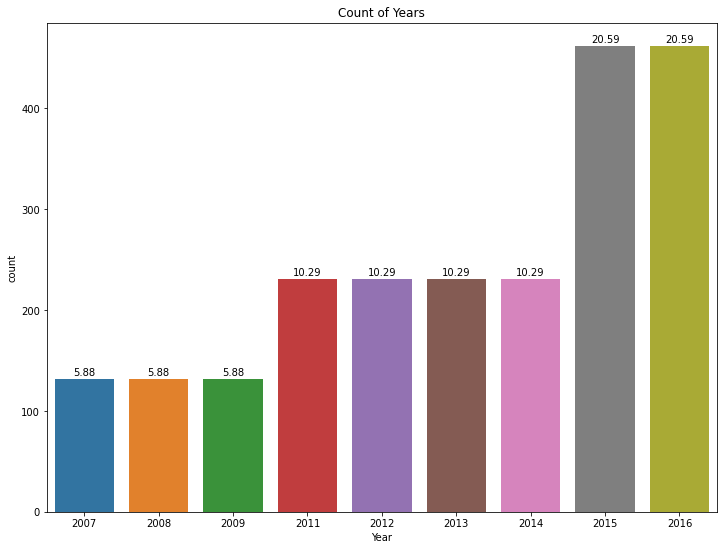

In [11]:
plt.figure(figsize=(12,9))
total=float(len(df['Year']))
ax = sns.countplot(x='Year', data=df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3,
          '{:1.2f}'.format((height/total)*100),
          ha='center')
plt.title('Count of Years')

## State

In [12]:
df['State'].value_counts()

TX    2244
Name: State, dtype: int64

This feature seems redundant as there is only one value, TX for all the entries.

### We can drop the State feature

## CoC Number

In [13]:
df['CoC Number'].value_counts()

TX-624    204
TX-500    204
TX-611    204
TX-601    204
TX-607    204
TX-701    204
TX-604    204
TX-503    204
TX-600    204
TX-700    204
TX-603    204
Name: CoC Number, dtype: int64

We have a uniform distribution between all the 11 unique values.

Since there is no order or ranking in the categorical variables, One Hot Encoding should be preferred.

Text(0.5, 1.0, 'Count of CoC Number')

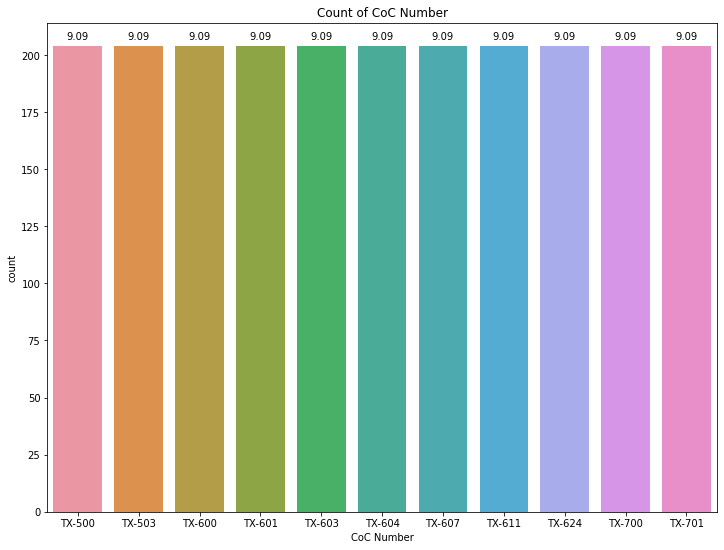

In [14]:
plt.figure(figsize=(12,9))
total=float(len(df['Year']))
ax = sns.countplot(x='CoC Number', data=df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3,
          '{:1.2f}'.format((height/total)*100),
          ha='center')
plt.title('Count of CoC Number')

## CoC Name

In [15]:
df['CoC Name'].value_counts()

Dallas City & County/Irving CoC                                         204
Houston, Pasadena, Conroe/Harris, Ft. Bend, Montgomery, Counties CoC    204
Amarillo CoC                                                            204
El Paso City & County CoC                                               204
Wichita Falls/Wise, Palo Pinto, Wichita, Archer Counties CoC            204
San Antonio/Bexar County CoC                                            204
Waco/McLennan County CoC                                                204
Bryan/College Station/Brazos Valley CoC                                 204
Austin/Travis County CoC                                                204
Texas Balance of State (BoS) CoC                                        204
Fort Worth/Arlington/Tarrant County CoC                                 204
Name: CoC Name, dtype: int64

### CoC Number and CoC Name are giving us the exactly same information. Using both the features in our model would be highly redundant. Hence, either one of them should be dropped.

## Measures

In [16]:
df['Measures'].value_counts()

Chronically Homeless Individuals                               99
Homeless People in Families                                    99
Homeless Individuals                                           99
Unsheltered Chronically Homeless Individuals                   99
Unsheltered Homeless                                           99
Sheltered Chronically Homeless Individuals                     99
Sheltered Homeless                                             99
Sheltered Homeless People in Families                          99
Unsheltered Homeless People in Families                        99
Sheltered Homeless Individuals                                 99
Total Homeless                                                 99
Unsheltered Homeless Individuals                               99
Homeless Veterans                                              66
Unsheltered Homeless Veterans                                  66
Chronically Homeless                                           66
Unsheltere

There are way too many unique values for this particular feature. We should proceed by merging the values into 4-5 main buckets.



1.   Sheltered Homeless
2.   Unsheltered Homeless
3.   Parenting Youth





In [30]:
def modify_measures(x):
  if "Sheltered Homeless" in x:
    return "Sheltered Homeless"
  elif "Unsheltered Homeless" in x:
    return "Unsheltered Homeless"
  elif "Parenting Youth" in x:
    return "Parenting Youth"
  elif "Homeless Individuals" or "Homeless People":
    return "Unsheltered Homeless"
  else:
    return "Others"

In [31]:
df['Measures_Modified'] = df['Measures'].apply(lambda x : modify_measures(x))

In [32]:
df.head()

,Year,State,CoC Number,CoC Name,Measures,Count,Measures_Modified
0,2007,TX,TX-500,San Antonio/Bexar County CoC,Chronically Homeless Individuals,218,Unsheltered Homeless
1,2007,TX,TX-500,San Antonio/Bexar County CoC,Homeless Individuals,1375,Unsheltered Homeless
2,2007,TX,TX-500,San Antonio/Bexar County CoC,Homeless People in Families,872,Unsheltered Homeless
3,2007,TX,TX-500,San Antonio/Bexar County CoC,Sheltered Chronically Homeless Individuals,96,Unsheltered Homeless
4,2007,TX,TX-500,San Antonio/Bexar County CoC,Sheltered Homeless,1798,Sheltered Homeless


In [33]:
df['Measures_Modified'].value_counts()

Unsheltered Homeless    1551
Sheltered Homeless       429
Parenting Youth          264
Name: Measures_Modified, dtype: int64

Text(0.5, 1.0, 'Count of Measures')

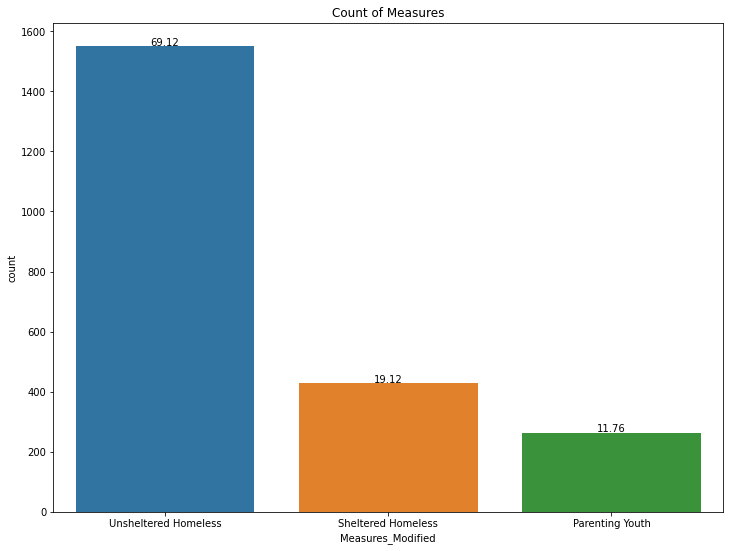

In [34]:
plt.figure(figsize=(12,9))
total=float(len(df['Year']))
ax = sns.countplot(x='Measures_Modified', data=df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3,
          '{:1.2f}'.format((height/total)*100),
          ha='center')
plt.title('Count of Measures')

## Count

### Count is an object currently. We need to change it to int.

In [22]:
df['Count'] = df['Count'].str.replace(',', '')

In [23]:
df['Count'] = df['Count'].astype(int)

In [24]:
df['Count'].describe()

count     2244.000000
mean       626.356506
std       1413.329429
min          0.000000
25%         13.000000
50%        100.500000
75%        521.000000
max      15327.000000
Name: Count, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


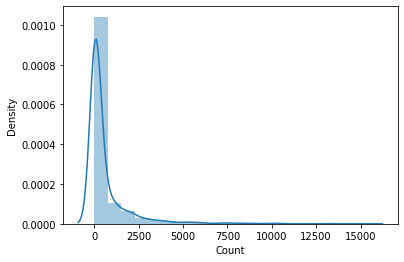

In [25]:
sns.distplot(df['Count'],bins=20)



1.   75% of count is below 521.
2.   The Standard Deviation is very high, ie 1413.
3.   The mean is 626 and the SD is 1413, this means we have a few abnormal outliers.





### We either need to remove the outliers, if they are very low in number or standardize the count feature.

# MultiVariate Analysis

### Year and Count

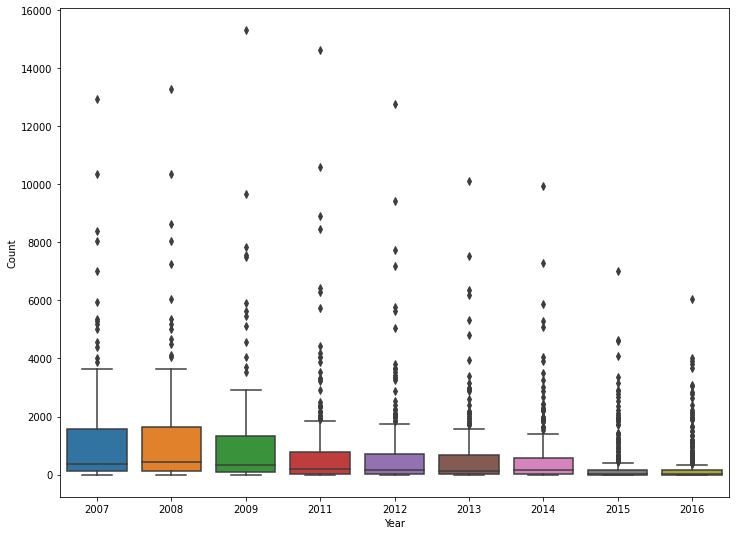

In [26]:
plt.figure(figsize=(12,9))
sns.boxplot(x='Year', y='Count', data=df)



1.   Homelessness seems to be going down every year.
2.   There is a ton of variance every year and all have them are above the upper bound.



## CoC Number and Count

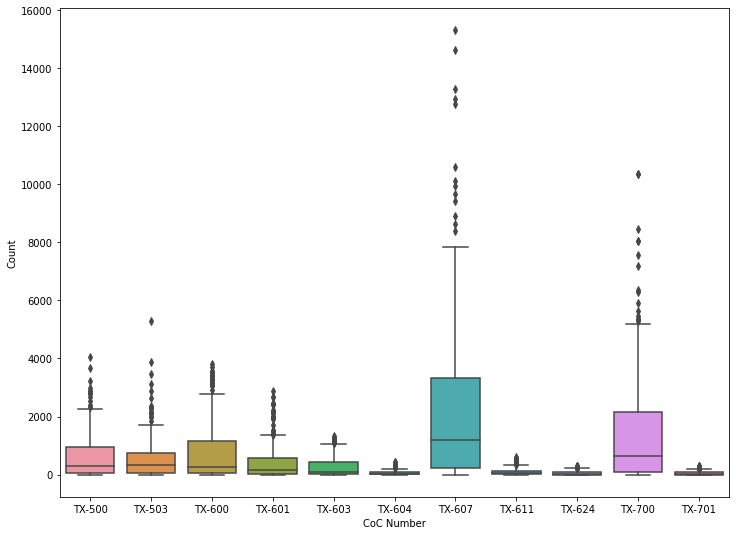

In [28]:
plt.figure(figsize=(12,9))
sns.boxplot(x='CoC Number', y='Count', data=df)



1.   TX-607 and TX-700 have the highest number of homeless people.
2.   The rest of the counties seem to have more or less similar counts of homelessness.



## Measures and Count

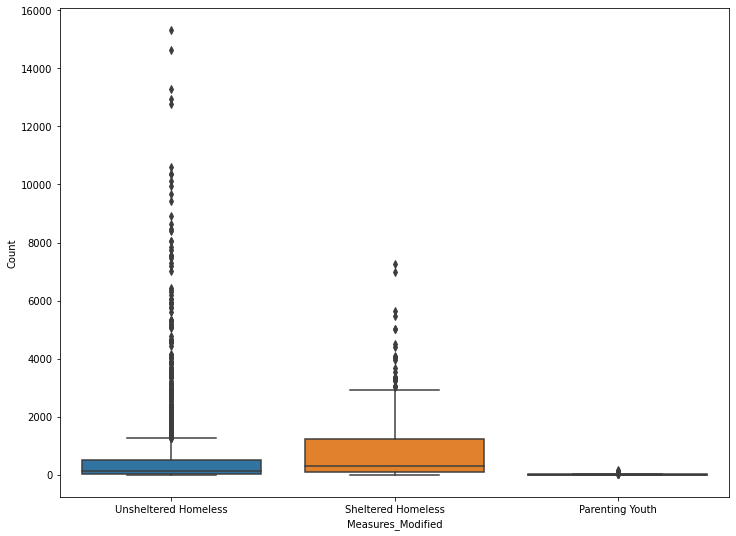

In [35]:
plt.figure(figsize=(12,9))
sns.boxplot(x='Measures_Modified', y='Count', data=df)



1.   Sheltered Homeless are the highest in count.
2.   This is followed by Unsheltered Homeless.

